In [55]:
#https://blog.keras.io/building-autoencoders-in-keras.html

import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [56]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [57]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [58]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [59]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [60]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [61]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2795 - val_loss: 0.1902
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1721 - val_loss: 0.1535
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1431 - val_loss: 0.1326
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1271 - val_loss: 0.1204
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1165 - val_loss: 0.1113
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1092 - val_loss: 0.1052
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1042 - val_loss: 0.1010
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1006 - val_loss: 0.0981
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0983 - val_loss: 0.0961
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0967 - val_loss: 0.0949

In [65]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 822us/step


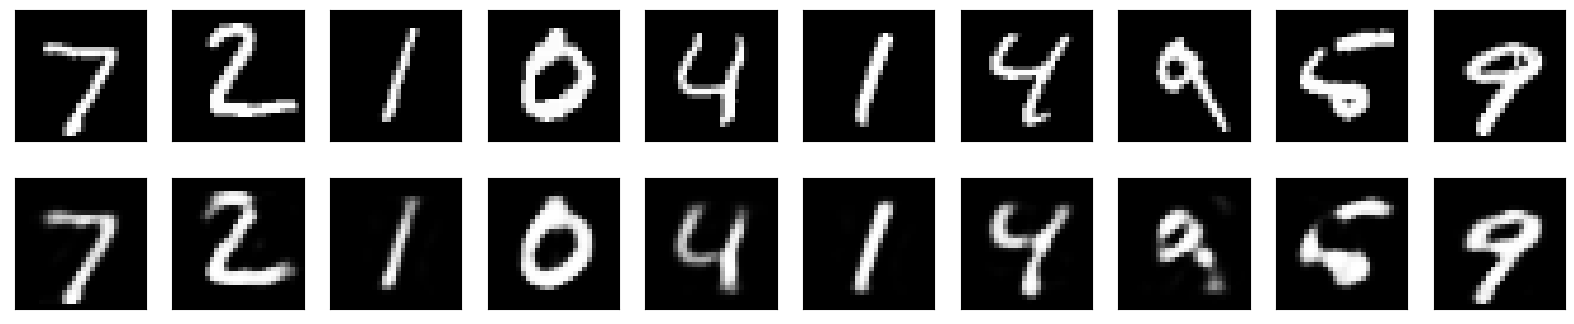

In [67]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep Auto Encoder

In [82]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
middle = layers.Dense(16, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(middle)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [69]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 7ms/step - loss: 0.2466 - val_loss: 0.1694
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1505 - val_loss: 0.1360
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1323 - val_loss: 0.1258
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1224 - val_loss: 0.1169
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1154 - val_loss: 0.1119
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1111 - val_loss: 0.1084
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1080 - val_loss: 0.1053
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1054 - val_loss: 0.1033
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1034 - val_loss: 0.1017
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1017 - val_lo

235/235 [==============================] - 2s 6ms/step - loss: 0.0808 - val_loss: 0.0806
Epoch 82/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0808 - val_loss: 0.0807
Epoch 83/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0807 - val_loss: 0.0806
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0807 - val_loss: 0.0806
Epoch 85/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0806 - val_loss: 0.0805
Epoch 86/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0805 - val_loss: 0.0804
Epoch 87/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0805 - val_loss: 0.0807
Epoch 88/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0805 - val_loss: 0.0805
Epoch 89/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0804 - val_loss: 0.0802
Epoch 90/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0803 - val_loss: 

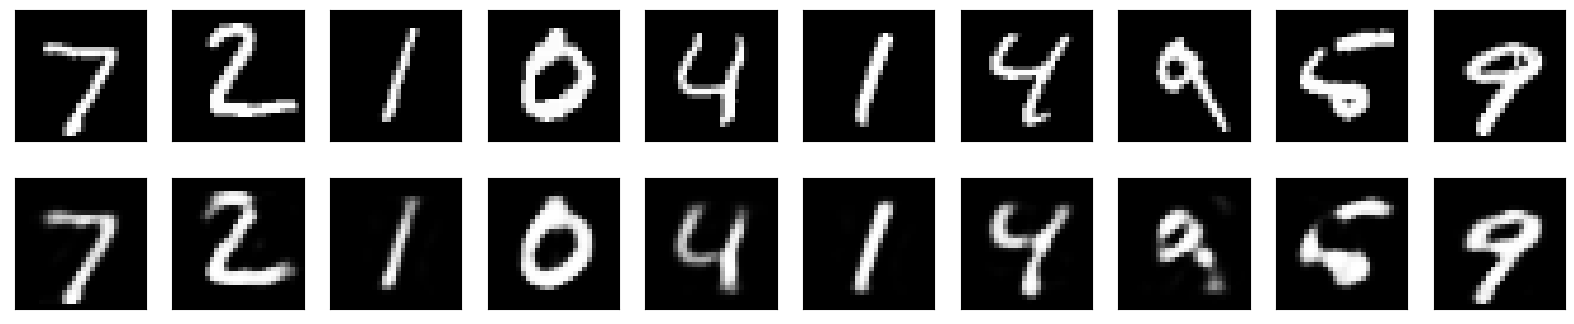

In [71]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_132 (Dense)           (None, 128)               100480    
                                                                 
 dense_133 (Dense)           (None, 64)                8256      
                                                                 
 dense_134 (Dense)           (None, 32)                2080      
                                                                 
 dense_135 (Dense)           (None, 16)                528       
                                                                 
 dense_136 (Dense)           (None, 8)                 136       
                                                                 
 dense_139 (Dense)           (None, 64)                576

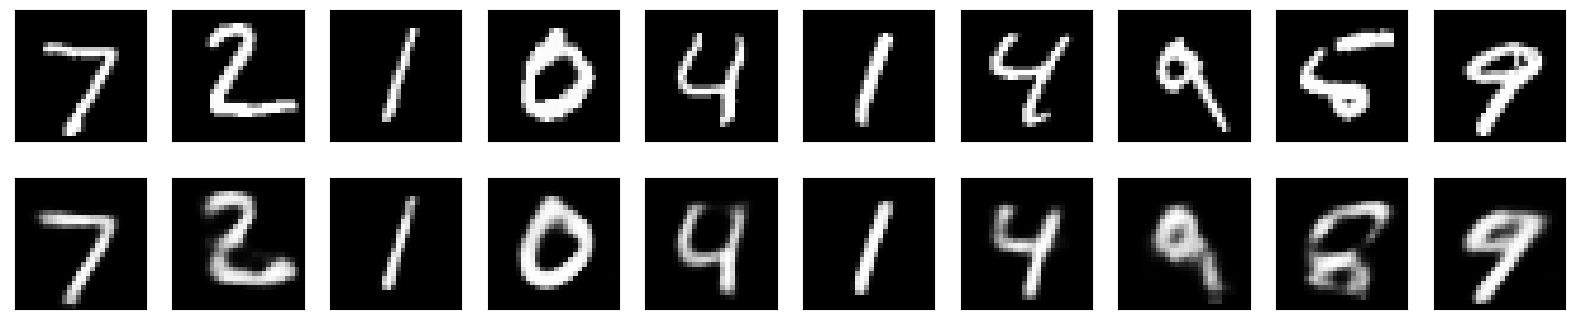

Epoch 1/100
235/235 [==============================] - 4s 7ms/step - loss: 0.2812 - val_loss: 0.2167
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1976 - val_loss: 0.1793
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1708 - val_loss: 0.1647
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1613 - val_loss: 0.1590
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1560 - val_loss: 0.1519
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1502 - val_loss: 0.1479
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1471 - val_loss: 0.1456
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1450 - val_loss: 0.1433
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1434 - val_loss: 0.1420
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1421 - val_lo

235/235 [==============================] - 1s 6ms/step - loss: 0.1194 - val_loss: 0.1213
Epoch 82/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1193 - val_loss: 0.1212
Epoch 83/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1193 - val_loss: 0.1211
Epoch 84/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1192 - val_loss: 0.1213
Epoch 85/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1191 - val_loss: 0.1210
Epoch 86/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1190 - val_loss: 0.1207
Epoch 87/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1190 - val_loss: 0.1210
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1189 - val_loss: 0.1209
Epoch 89/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1189 - val_loss: 0.1211
Epoch 90/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1189 - val_loss: 

ValueError: cannot reshape array of size 8 into shape (1,1)

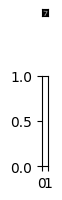

In [86]:
#https://arakan-pgm-ai.hatenablog.com/entry/2020/06/08/000000

import tensorflow as tf
from tensorflow.keras.layers import Dense
#from tensorflow.keras.datasets import fashion_mnist as mnist
from tensorflow.keras.datasets import mnist
import numpy as np
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt


# this is the size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32

# this is our input placeholder
input_img = tf.keras.Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = tf.keras.Model(inputs=input_img, outputs=decoded)

autoencoder.summary()

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy())

# autoencoder.load_weights('autoencoder.h5')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

autoencoder.save_weights('autoencoder.h5')
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

intermediate_layer_model = tf.keras.Model(
    inputs=input_img,
    outputs=autoencoder.get_layer('dense_136').output)
intermediate_imgs = intermediate_layer_model.predict(x_test)

n = 100# how many digits we will display
plt.figure(figsize=(10, 4))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(intermediate_imgs[i].reshape(1, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


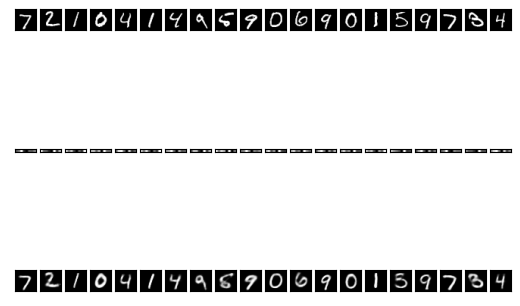

In [87]:
n = 20
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(intermediate_imgs[i].reshape(1, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [77]:
n

100